In [ ]:
#  Build convolutional neural network with Keras and theano
# ref: https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [19]:
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
import theano

In [5]:
import keras

/Users/sulbha/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [6]:
# import the Sequential model type from Keras. This is simply a linear stack of neural network layers, and 
# it's perfect for the type of feed-forward CNN

In [7]:
from keras.models import Sequential

In [8]:
# import the "core" layers from Keras. These are the layers that are used in almost any neural network:

In [9]:
from keras.layers import Dense, Dropout, Activation, Flatten

In [10]:
# import the CNN layers from Keras. These are the convolutional layers that will help us efficiently train 
# on image data:

In [11]:
from keras.layers import Convolution2D, MaxPooling2D

In [12]:
# import some utilities. This will help us transform our data

In [13]:
from keras.utils import np_utils

In [14]:
# Load image data from MNIST

In [15]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [16]:
print (X_train.shape)

(60000, 28, 28)


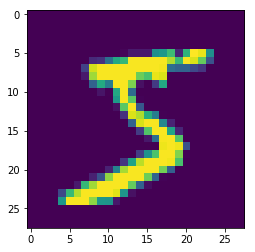

In [18]:
# plot  the data 
plt.imshow(X_train[0])

In [20]:
# Preprocessing the data

When using the Theano backend, you must explicitly declare a dimension for the depth of the input image. For example, a full-color image with all 3 RGB channels will have a depth of 3.

Our MNIST images only have a depth of 1, but we must explicitly declare that.

In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height).

In [21]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)


In [22]:
print (X_train.shape)

(60000, 1, 28, 28)


final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range [0, 1].`m

In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
# preprocess class labels

In [27]:
print (y_train.shape)

(60000,)


In [29]:
print (y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
# it is expected to have 10 different class values, intead it has have a 1-dimensional array. 

In [32]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [33]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [35]:
Y_train.shape

(60000, 10)

In [36]:
# Define Model architecture

In [37]:
model = Sequential()


In [38]:
# define CNN input layer

In [48]:
from keras import backend as K
K.set_image_dim_ordering('th')


In [49]:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 


/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28...)`
  """Entry point for launching an IPython kernel.
/Users/sulbha/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [53]:

# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)
 
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)


/Users/sulbha/anaconda/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ValueError: Error when checking input: expected conv2d_6_input to have shape (3, 28, 28) but got array with shape (1, 28, 28)